In [1]:
## IMport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

In [2]:
## importing the files 

df1 = read_csv('Airflow_level_masspull_WSD.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = read_csv('Chemical_add_variables_WSD.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df3 = read_csv('Additional_masspull_variable_WSD.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df4 = read_csv('Cyclone_feed_size_WSD.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#print(df.head())

In [3]:
## Making copy of dataframe

df_m=df1.copy()
df_n=df2.copy()
df_o=df3.copy()
df_p=df4.copy()

In [4]:
df_m.shape

(482101, 44)

In [5]:
df_n.shape

(482101, 53)

In [6]:
df_o.shape

(482101, 28)

In [7]:
df_p.shape

(482101, 27)

In [8]:
## Function for changing data type to numric

def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [9]:
NumericDtype(df_m)
NumericDtype(df_n)
NumericDtype(df_o)
NumericDtype(df_p)

In [10]:
## calculating summary ##
def summary5point(dataframe):
    perc=[0.25,0.50,0.75]
    include=['object', 'float', 'int']
    desc = dataframe.describe(percentiles = perc, include = include)
    #dataframe=str(dataframe)
    desc.to_csv('dataframe'+'.csv')
    return;

In [11]:
summary5point(df_m)
summary5point(df_n)
summary5point(df_o)
summary5point(df_p)

# Hourly Stats

In [12]:
#Resampling of data
by_time1=df_m.resample('H').mean()
by_time2=df_n.resample('H').mean()
by_time3=df_o.resample('H').mean()
by_time4=df_p.resample('H').mean()

In [13]:
## Save Resample data into CSV
by_time1.to_csv('Airflow_level_masspull_WSD_Hour.csv')
by_time2.to_csv('Chemical_add_variables_WSD_Hour.csv')
by_time3.to_csv('Additional_masspull_variable_WSD_Hour.csv')
by_time4.to_csv('Cyclone_feed_size_WSD_Hour.csv')

In [14]:
## importing the hourly files 

data1 = read_csv('Airflow_level_masspull_WSD_Hour.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data2 = read_csv('Chemical_add_variables_WSD_Hour.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data3 = read_csv('Additional_masspull_variable_WSD_Hour.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data4 = read_csv('Cyclone_feed_size_WSD_Hour.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#print(df.head())

In [15]:
## Making copy of dataframe

df_a=data1.copy()
df_b=data2.copy()
df_c=data3.copy()
df_d=data4.copy()

In [16]:
def filter_cols(df):
    df.drop([col for col in df.columns if "-MODE" in col], axis=1, inplace=True)
    df.drop([col for col in df.columns if "-SP" in col], axis=1, inplace=True)
    df.drop([col for col in df.columns if "-OP" in col], axis=1, inplace=True)

In [17]:
filter_cols(df_a)
filter_cols(df_b)
filter_cols(df_c)
filter_cols(df_d)

In [18]:
NumericDtype(df_a)
NumericDtype(df_b)
NumericDtype(df_c)
NumericDtype(df_d)

# Time Series Analysis

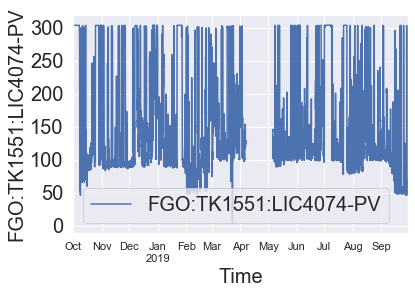

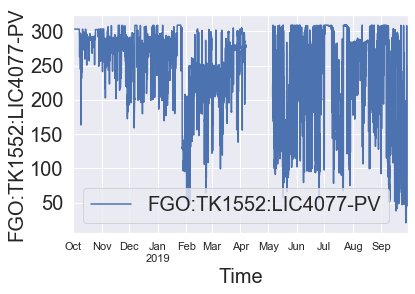

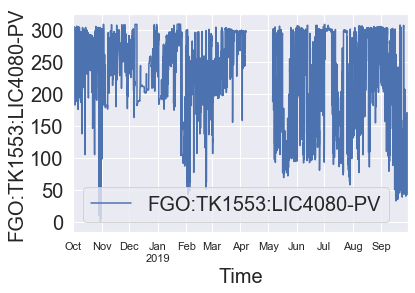

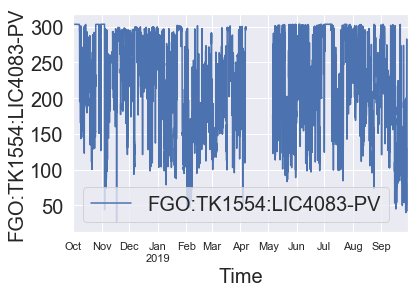

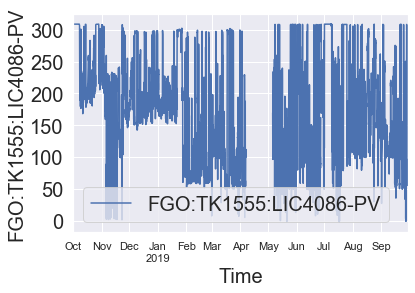

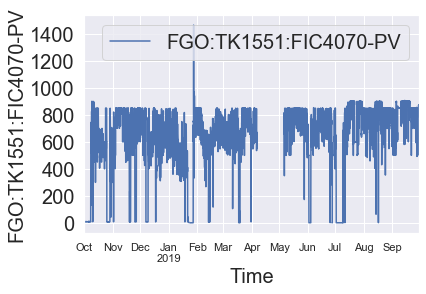

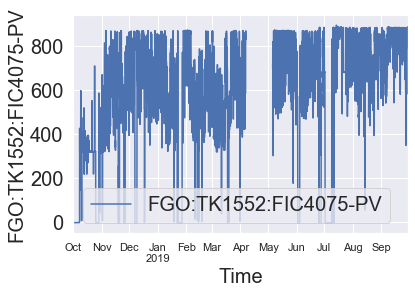

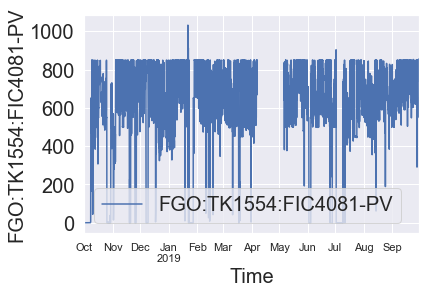

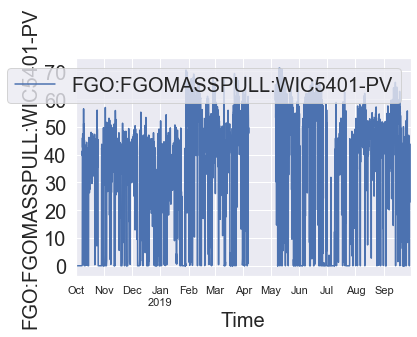

In [19]:
fig_list= list(df_a)
pp = PdfPages('Airflow_level_masspull_WSD_Hourly_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_a[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

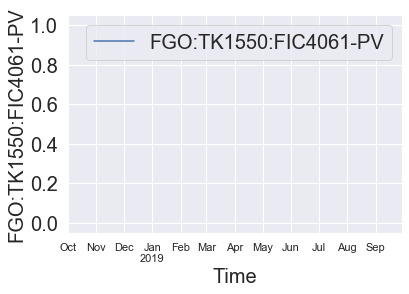

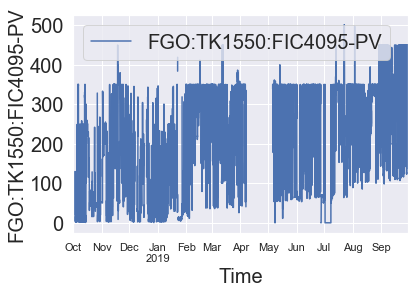

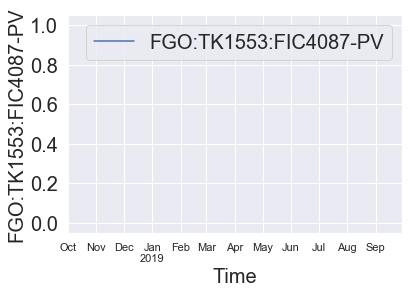

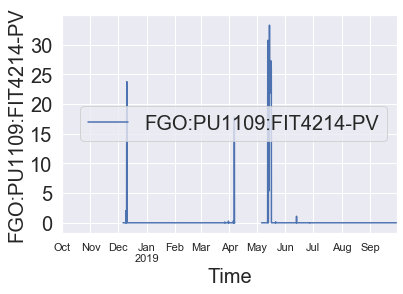

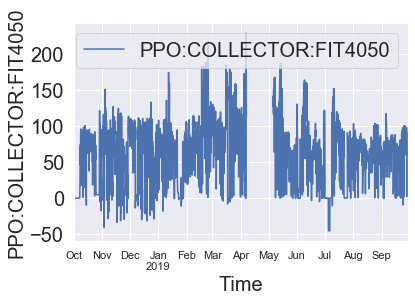

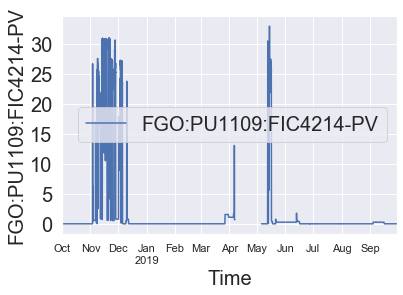

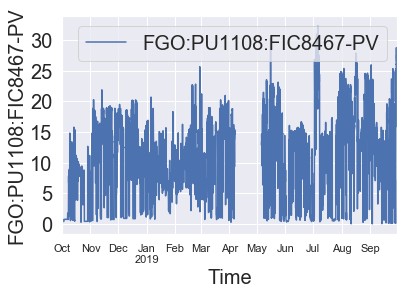

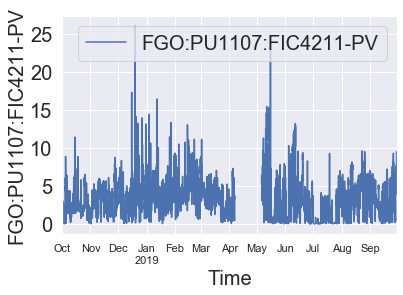

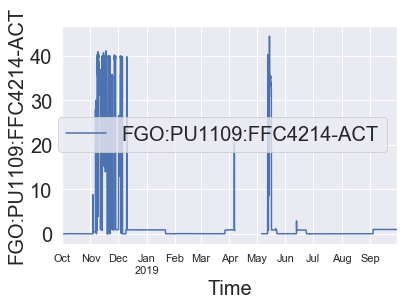

In [20]:
fig_list= list(df_b)
pp = PdfPages('Chemical_add_variables_WSD_Hourly_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_b[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

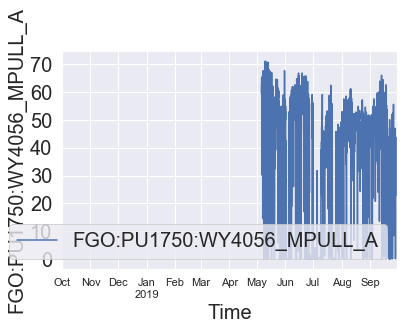

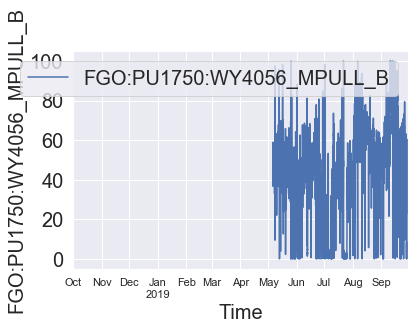

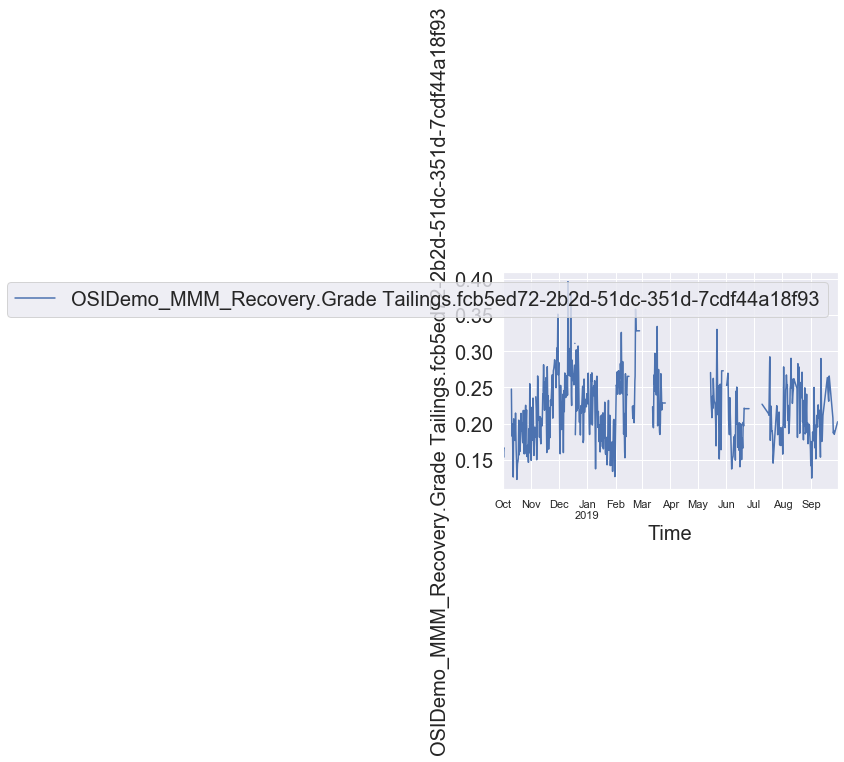

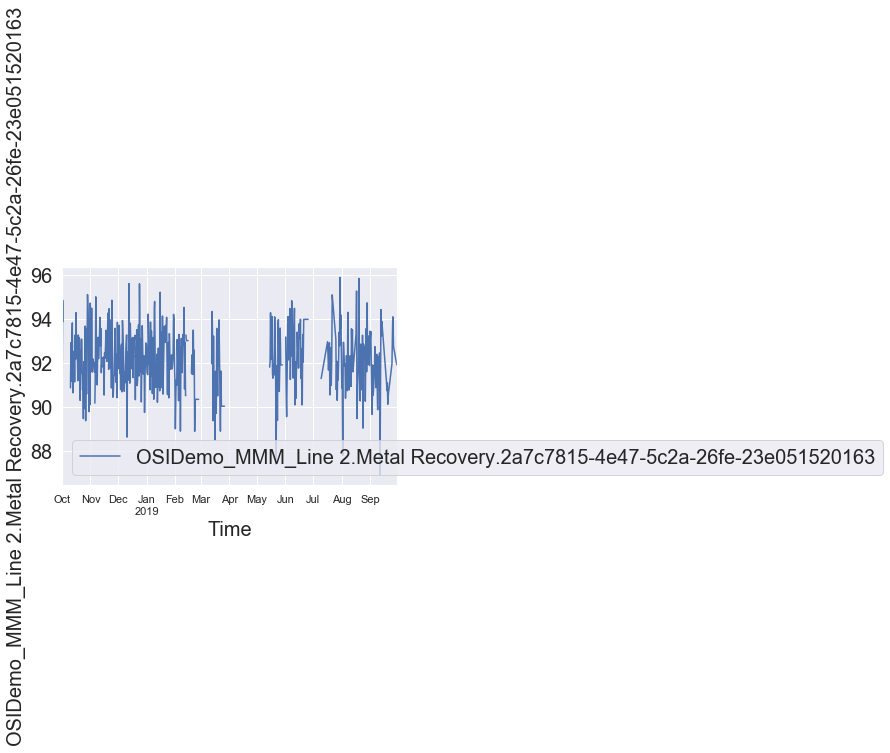

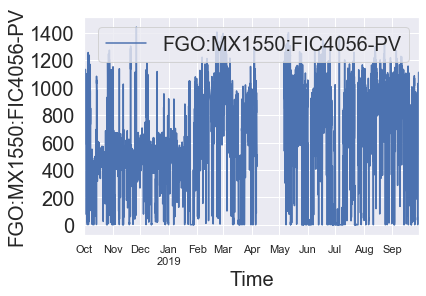

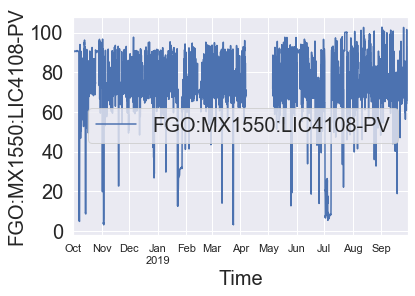

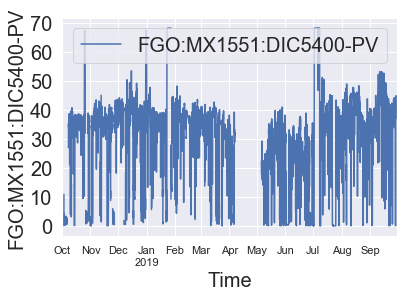

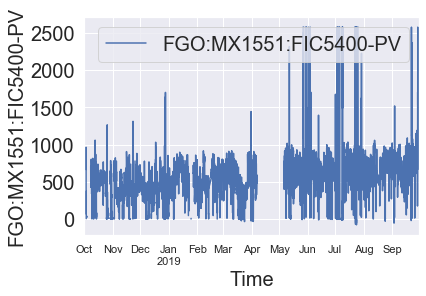

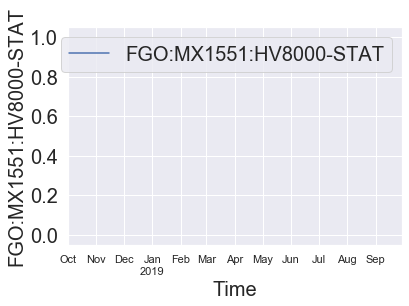

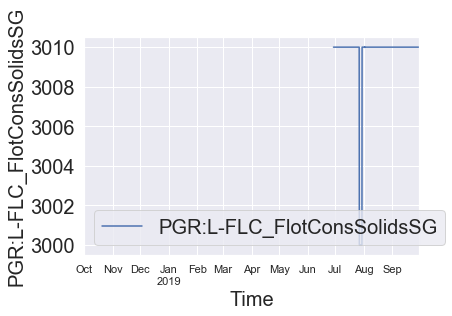

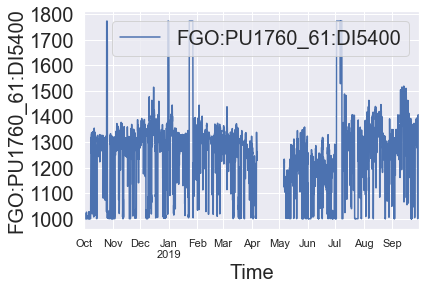

In [21]:
fig_list= list(df_c)
pp = PdfPages('Additional_masspull_variable_WSD_Hourly_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_c[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

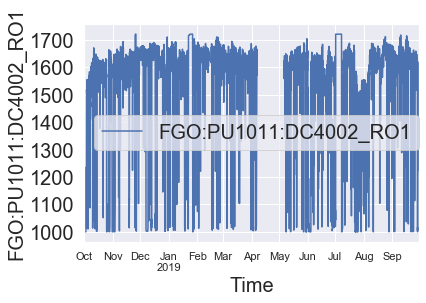

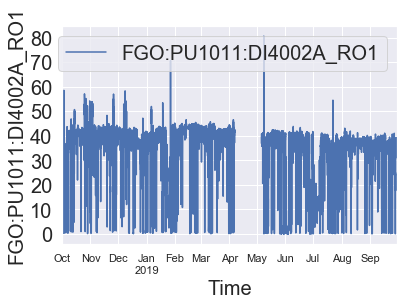

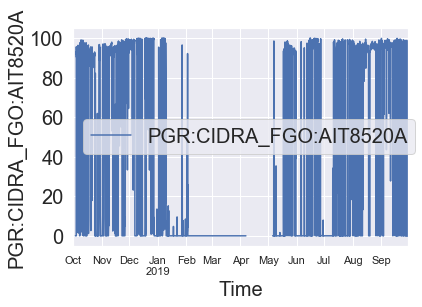

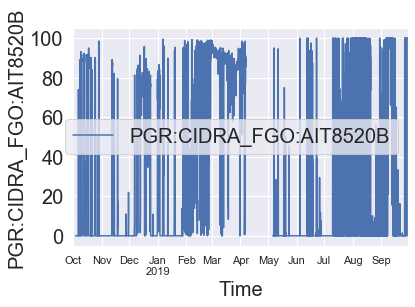

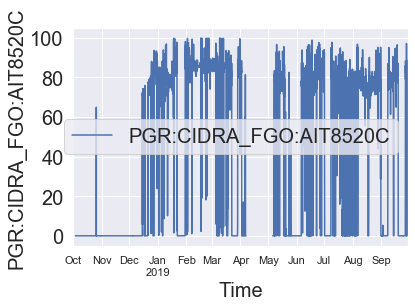

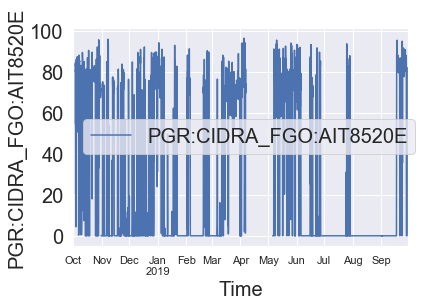

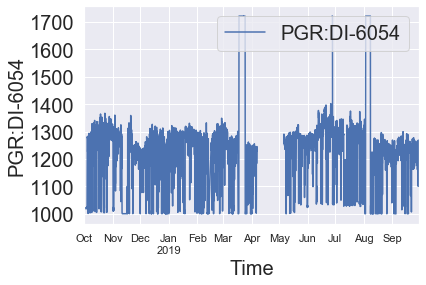

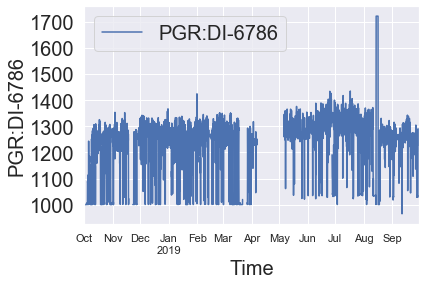

In [22]:
fig_list= list(df_d)
pp = PdfPages('Cyclone_feed_size_WSD_Hourly_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_d[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

# Daily Stats

In [23]:
#Resampling of data
by_time5=df_m.resample('D').mean()
by_time6=df_n.resample('D').mean()
by_time7=df_o.resample('D').mean()
by_time8=df_p.resample('D').mean()

In [24]:
df_e=by_time5.copy()
df_f=by_time6.copy()
df_g=by_time7.copy()
df_h=by_time8.copy()

In [25]:
filter_cols(df_e)
filter_cols(df_f)
filter_cols(df_g)
filter_cols(df_h)

In [26]:
NumericDtype(df_e)
NumericDtype(df_f)
NumericDtype(df_g)
NumericDtype(df_h)

# Time Series Analysis

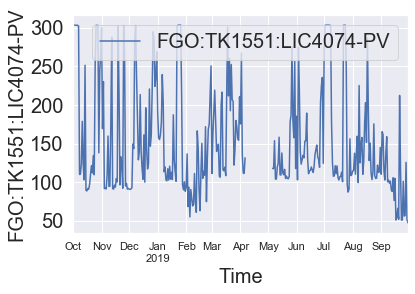

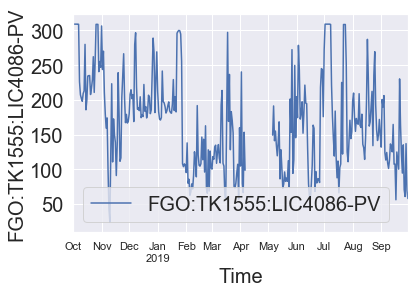

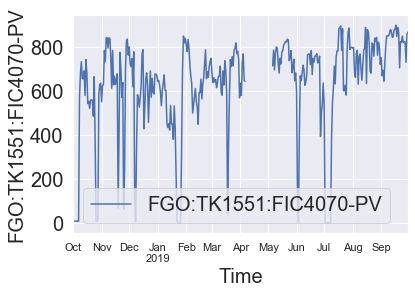

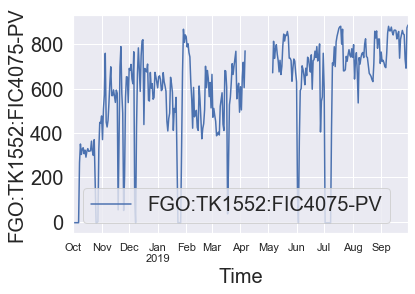

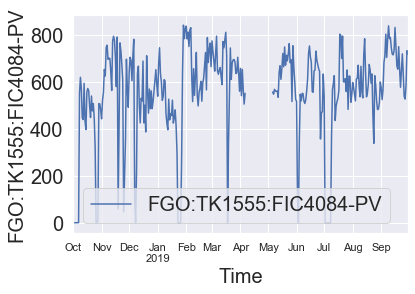

In [27]:
fig_list= list(df_e)
pp = PdfPages('Airflow_level_masspull_WSD_Daily_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_e[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

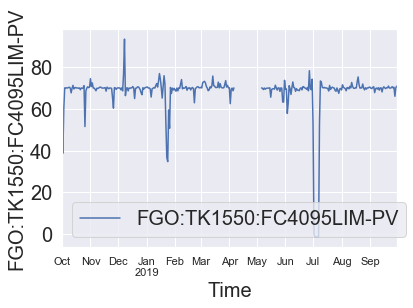

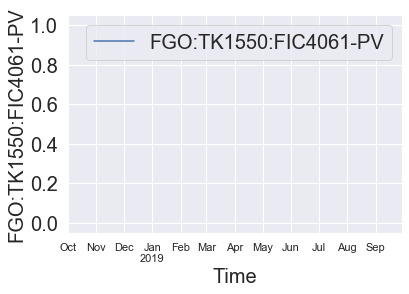

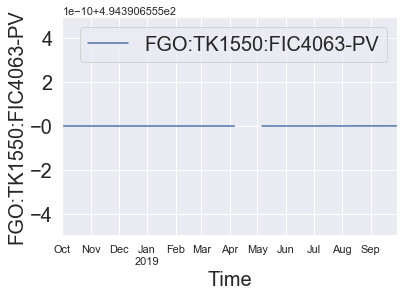

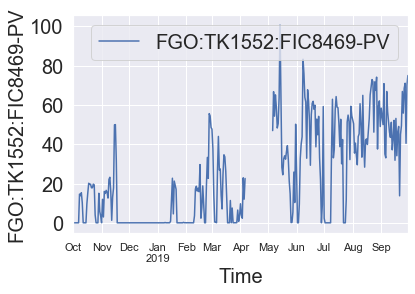

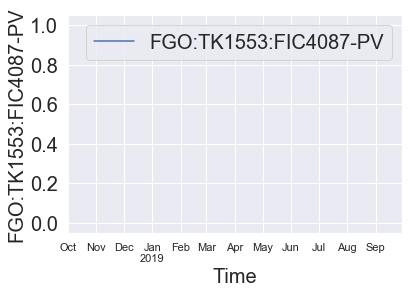

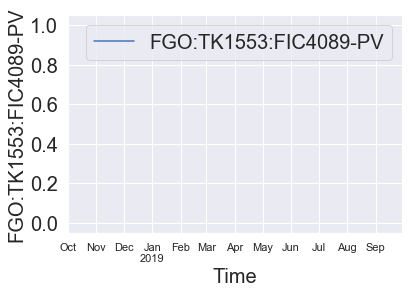

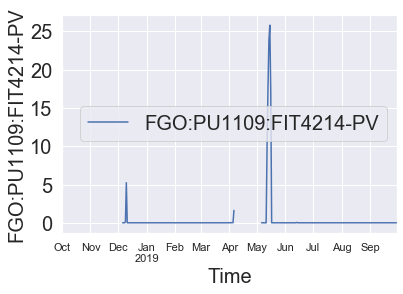

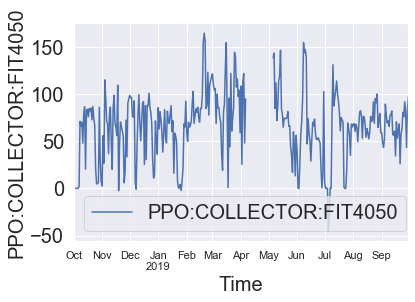

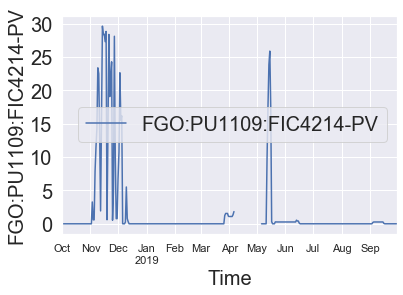

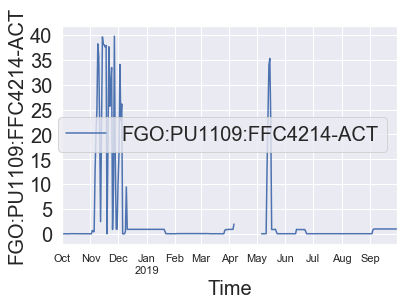

In [28]:
fig_list= list(df_f)
pp = PdfPages('Chemical_add_variables_WSD_Daily_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_f[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

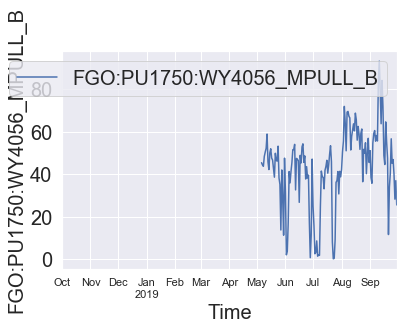

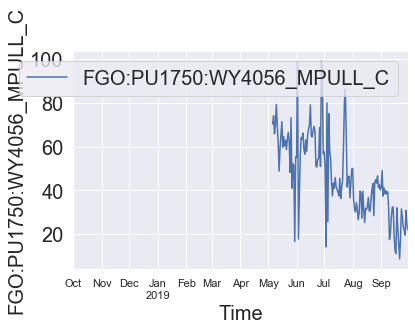

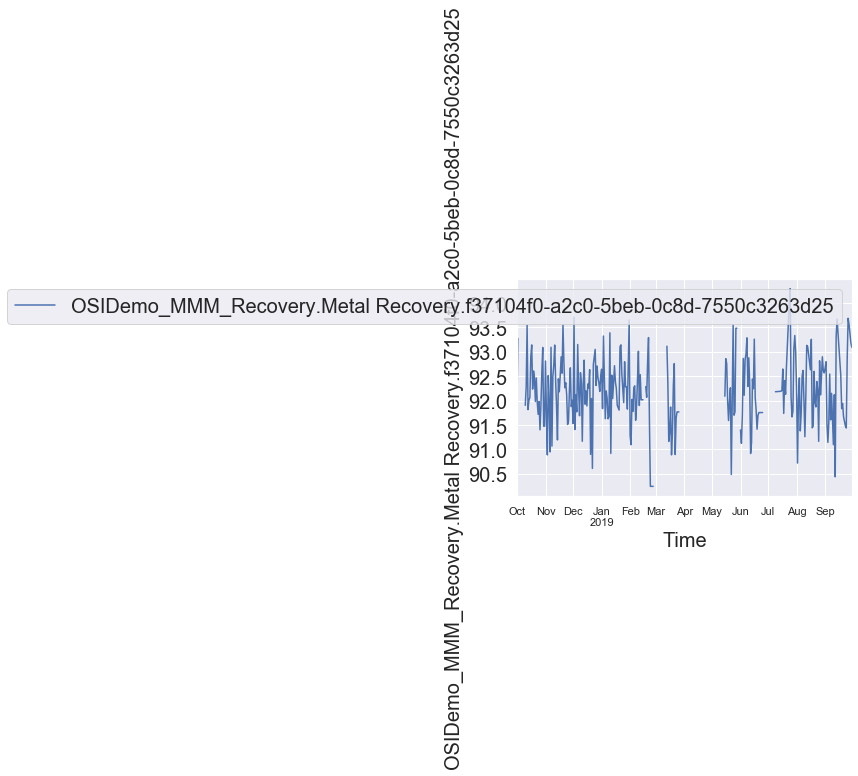

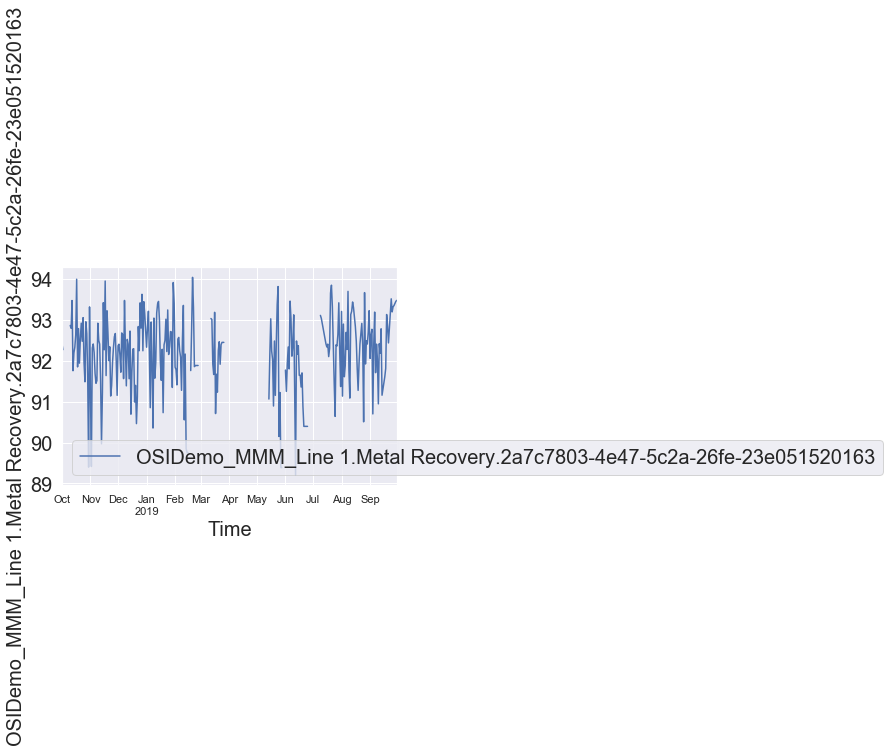

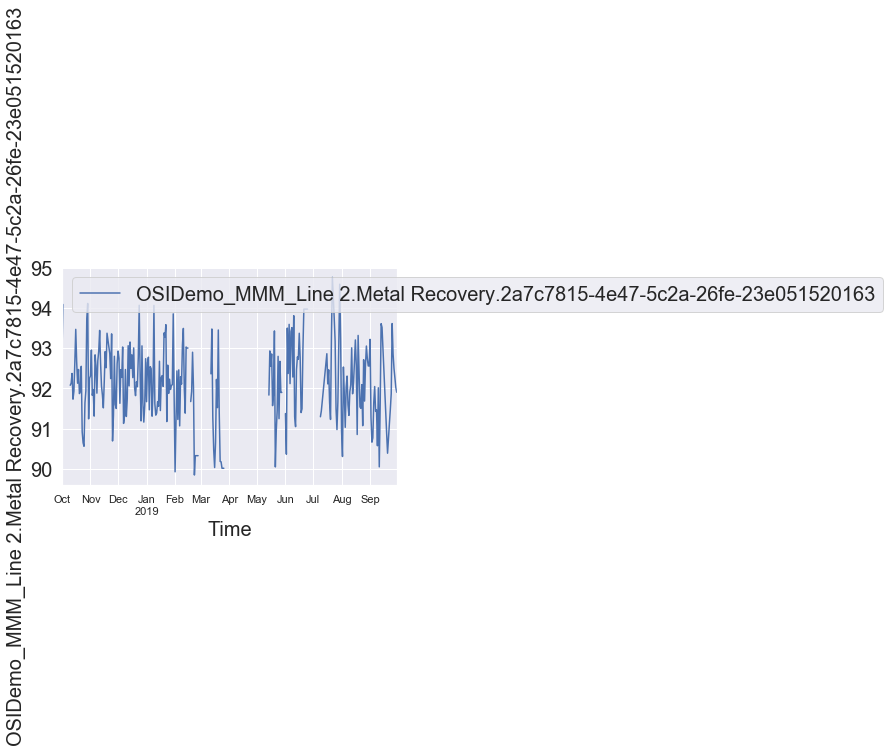

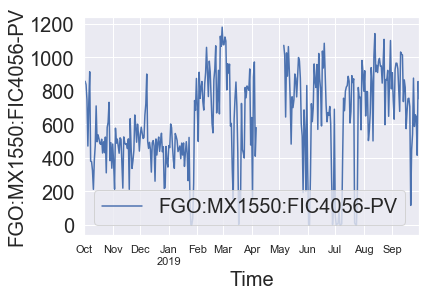

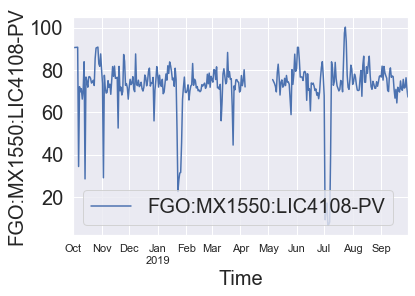

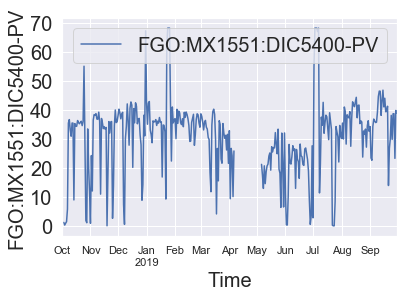

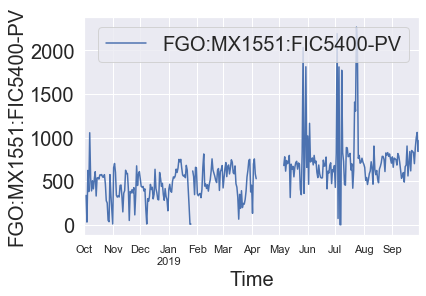

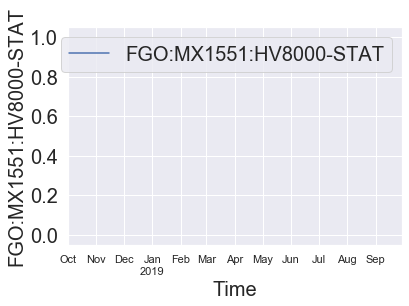

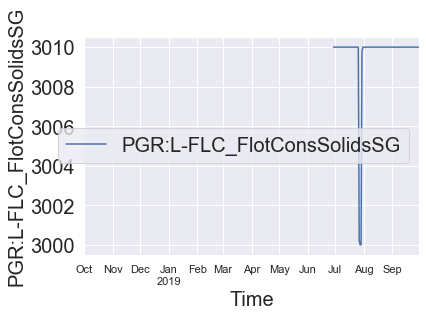

In [29]:
fig_list= list(df_g)
pp = PdfPages('Additional_masspull_variable_WSD_Daily_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_g[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

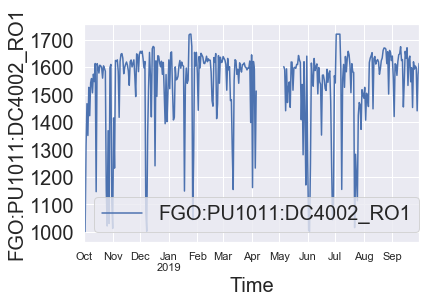

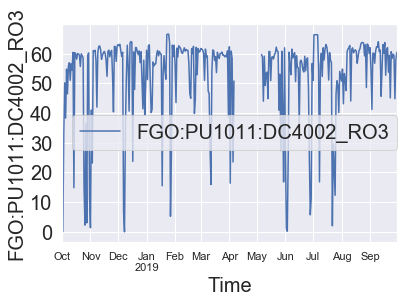

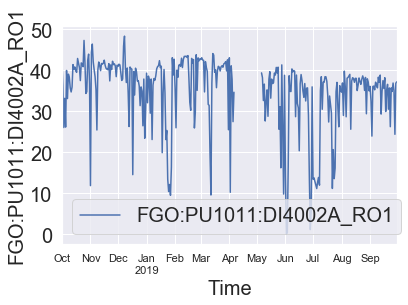

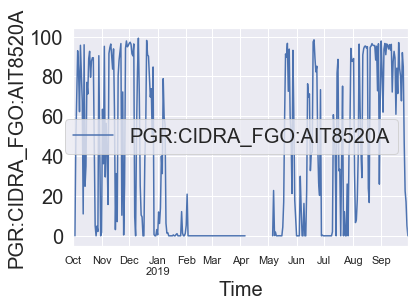

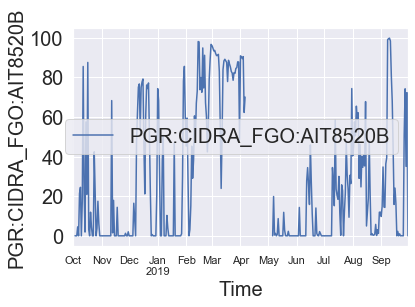

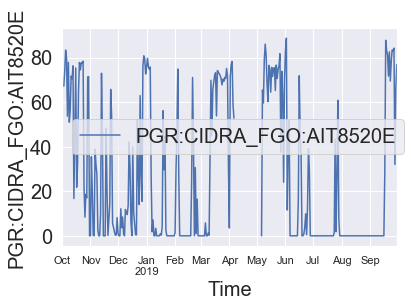

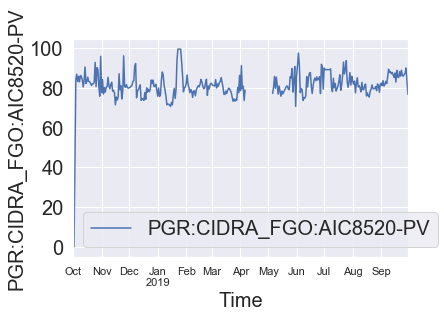

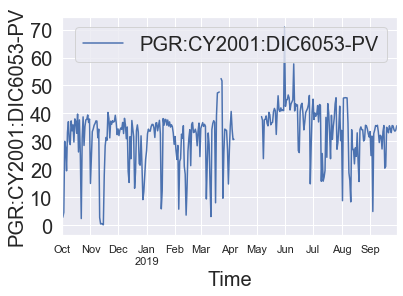

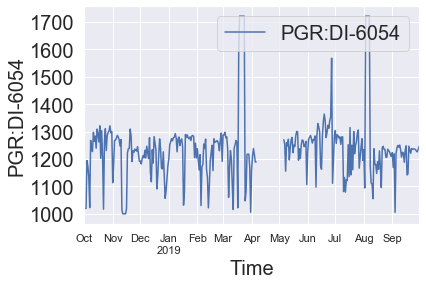

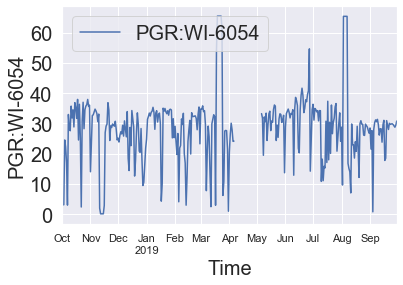

In [30]:
fig_list= list(df_h)
pp = PdfPages('Cyclone_feed_size_WSD_Daily_TimeSeries_plots.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax = df_h[i].plot()
    ax.set(xlabel='Time', ylabel=(i))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

# Histogram- Daily Basis

No handles with labels found to put in legend.


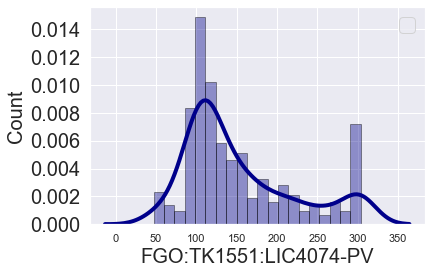

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


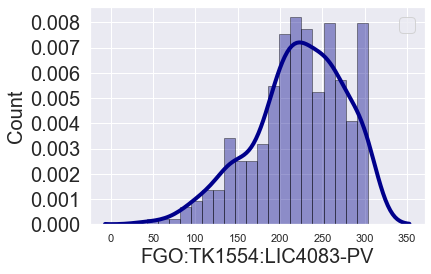

No handles with labels found to put in legend.


No handles with labels found to put in legend.


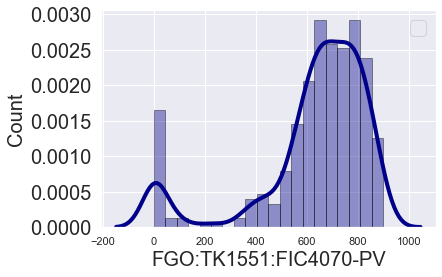

No handles with labels found to put in legend.


No handles with labels found to put in legend.


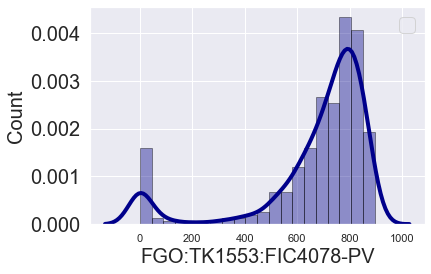

No handles with labels found to put in legend.


No handles with labels found to put in legend.


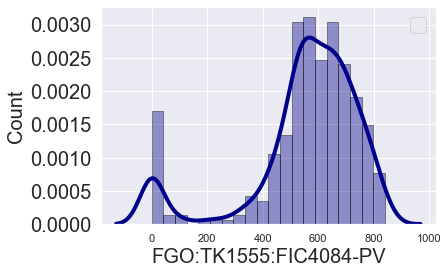

No handles with labels found to put in legend.


In [31]:
fig_list= list(df_e)
pp = PdfPages('Airflow_level_masspull_WSD_Daily_Histogram_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.distplot(df_e[i].dropna().values, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    ax.set(xlabel=i, ylabel='Count')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


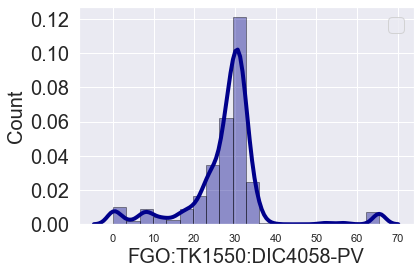

No handles with labels found to put in legend.


No handles with labels found to put in legend.


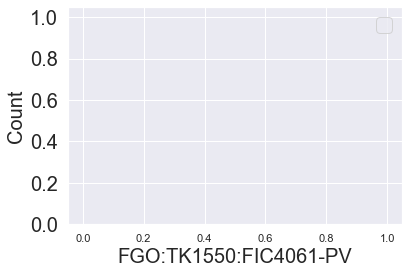

No handles with labels found to put in legend.


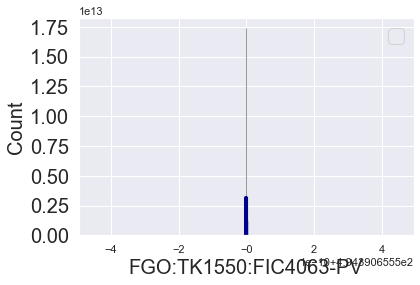

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


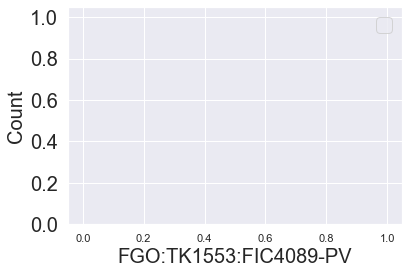

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


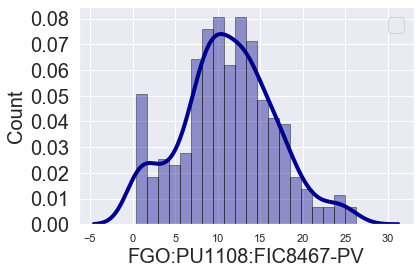

No handles with labels found to put in legend.


No handles with labels found to put in legend.


In [32]:
fig_list= list(df_f)
pp = PdfPages('Chemical_add_variables_WSD_Daily_Histogram_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.distplot(df_f[i].dropna().values, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    ax.set(xlabel=i, ylabel='Count')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


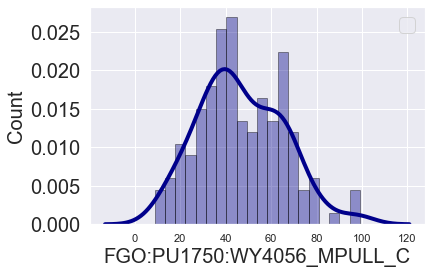

No handles with labels found to put in legend.


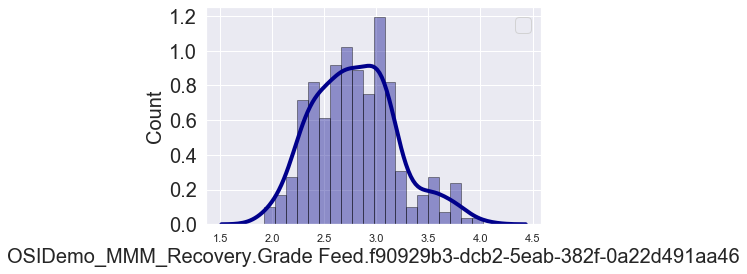

No handles with labels found to put in legend.


No handles with labels found to put in legend.


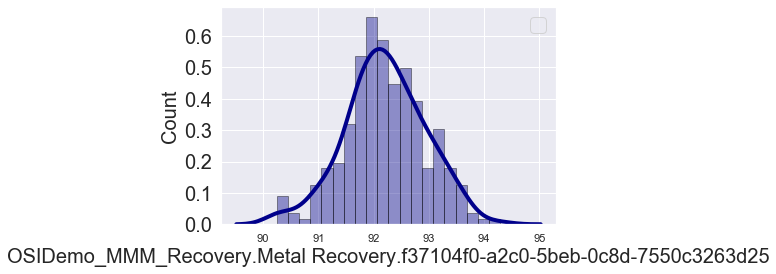

No handles with labels found to put in legend.


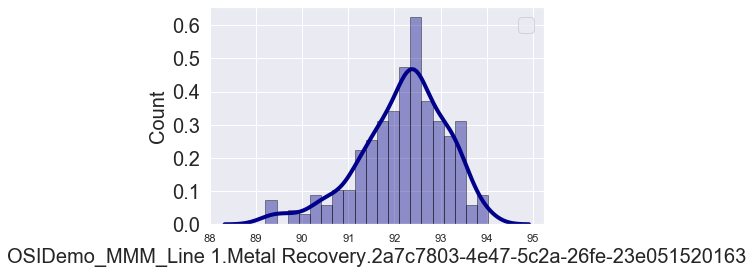

No handles with labels found to put in legend.


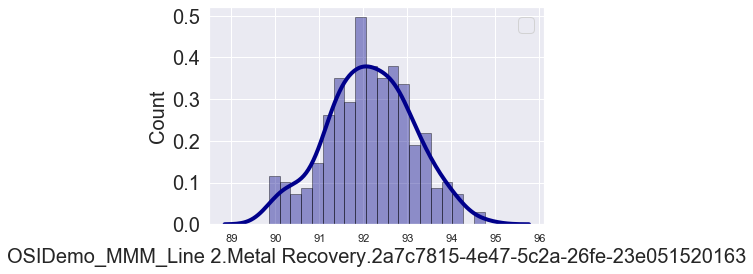

No handles with labels found to put in legend.


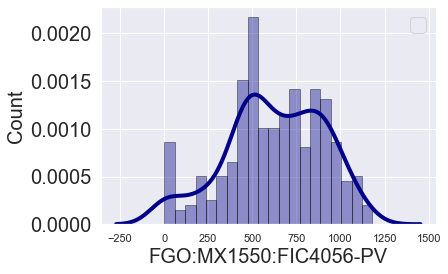

No handles with labels found to put in legend.


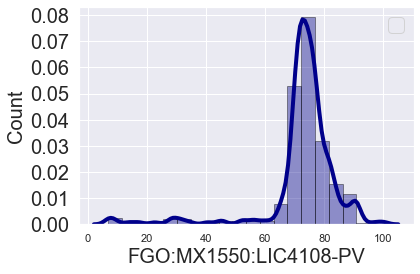

No handles with labels found to put in legend.


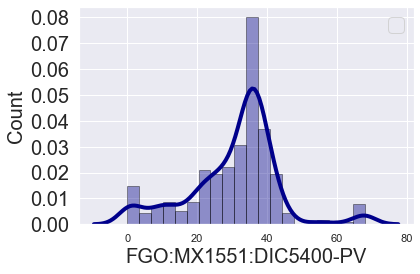

No handles with labels found to put in legend.


No handles with labels found to put in legend.


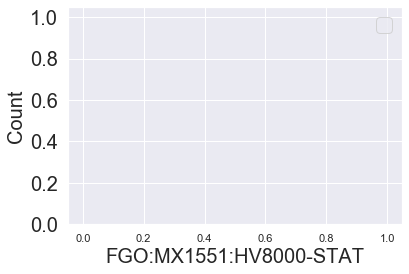

No handles with labels found to put in legend.


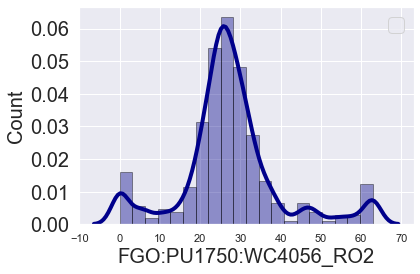

No handles with labels found to put in legend.


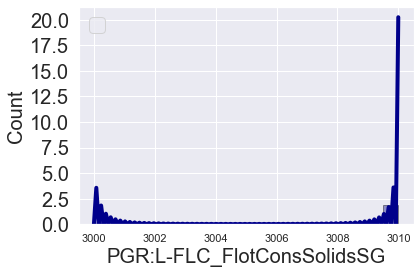

No handles with labels found to put in legend.


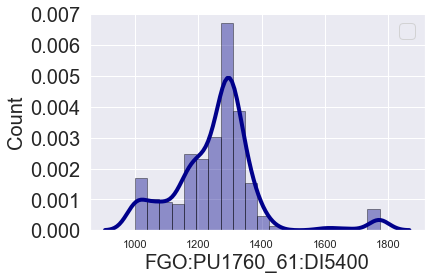

In [33]:
fig_list= list(df_g)
pp = PdfPages('Additional_masspull_variable_WSD_Daily_Histogram_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.distplot(df_g[i].dropna().values, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    ax.set(xlabel=i, ylabel='Count')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


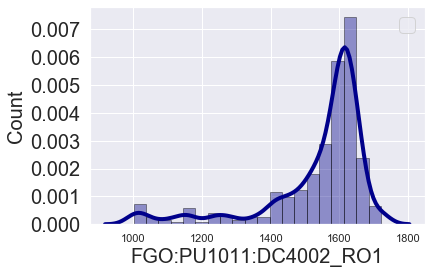

No handles with labels found to put in legend.


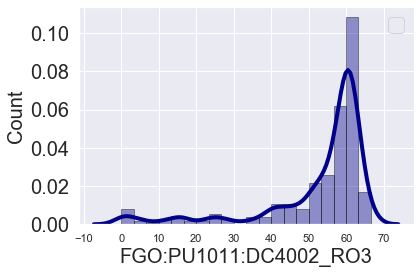

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


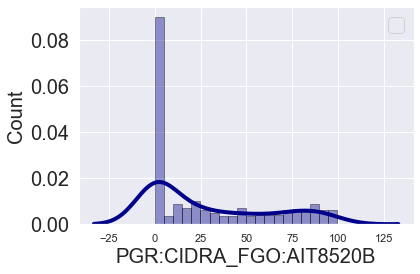

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


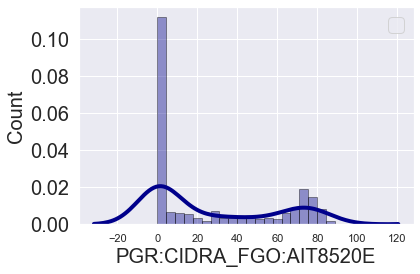

No handles with labels found to put in legend.


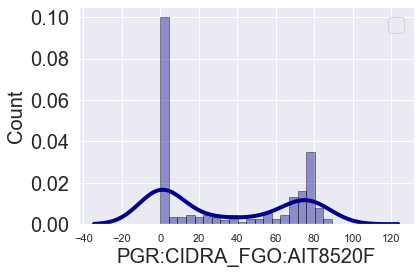

No handles with labels found to put in legend.


No handles with labels found to put in legend.


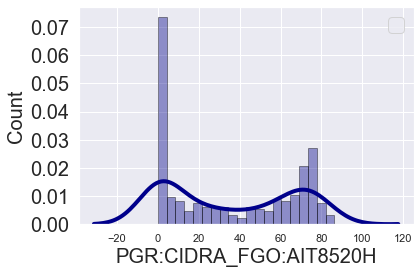

No handles with labels found to put in legend.


No handles with labels found to put in legend.


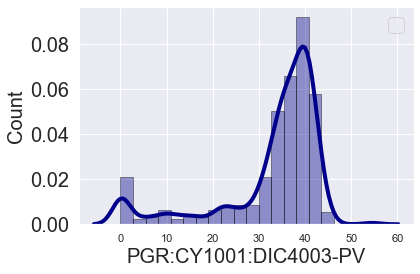

No handles with labels found to put in legend.


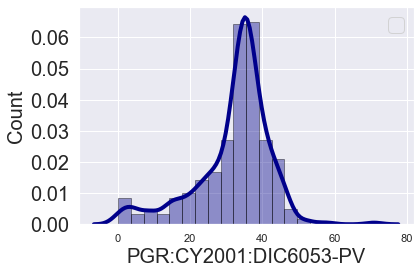

No handles with labels found to put in legend.


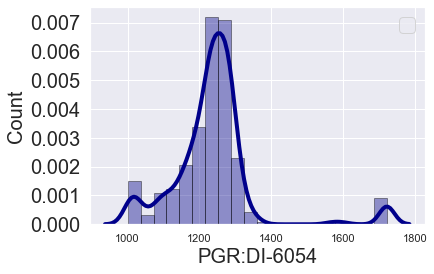

No handles with labels found to put in legend.


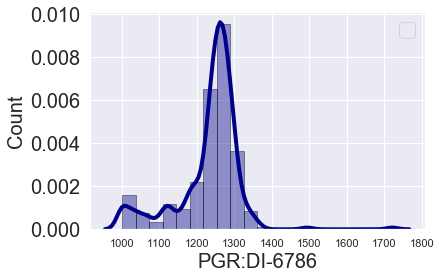

No handles with labels found to put in legend.


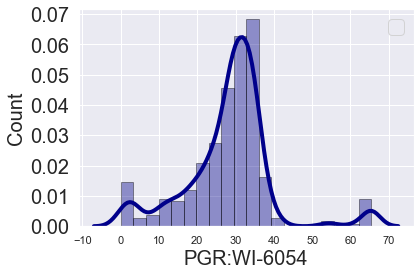

No handles with labels found to put in legend.


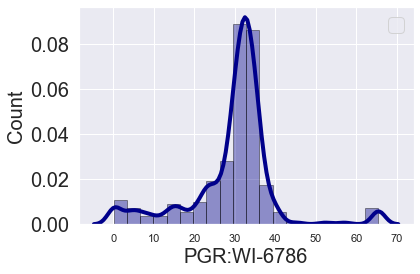

In [34]:
fig_list= list(df_h)
pp = PdfPages('Cyclone_feed_size_WSD_Daily_Histogram_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.distplot(df_h[i].dropna().values, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    ax.set(xlabel=i, ylabel='Count')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

# Violin Plots_ Daily

No handles with labels found to put in legend.


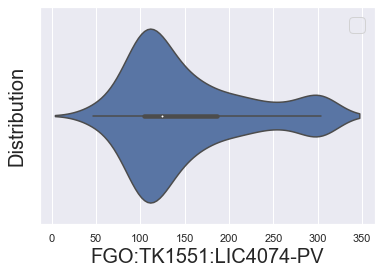

No handles with labels found to put in legend.


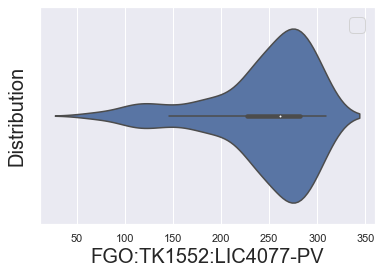

No handles with labels found to put in legend.


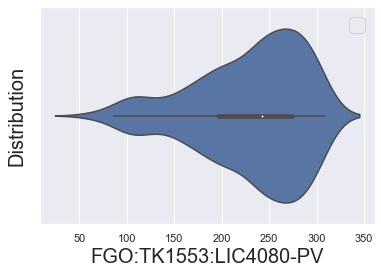

No handles with labels found to put in legend.


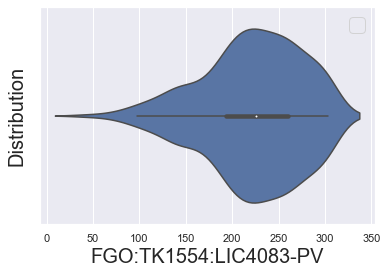

No handles with labels found to put in legend.


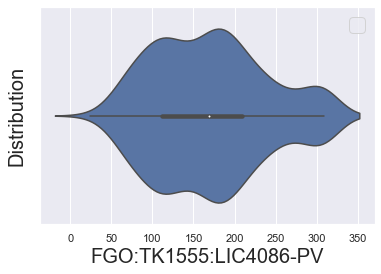

No handles with labels found to put in legend.


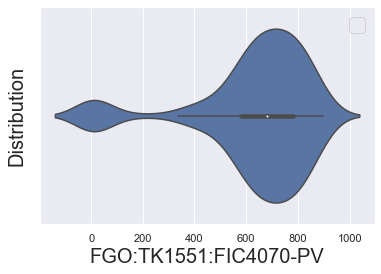

No handles with labels found to put in legend.


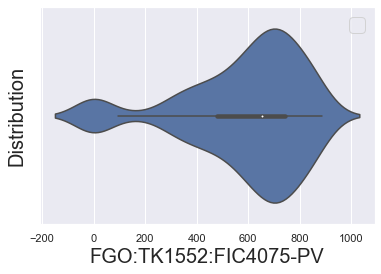

No handles with labels found to put in legend.


No handles with labels found to put in legend.


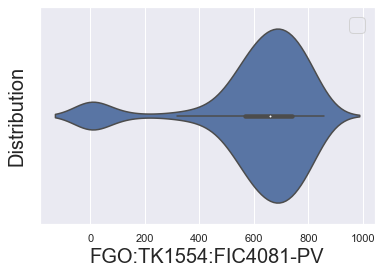

No handles with labels found to put in legend.


No handles with labels found to put in legend.


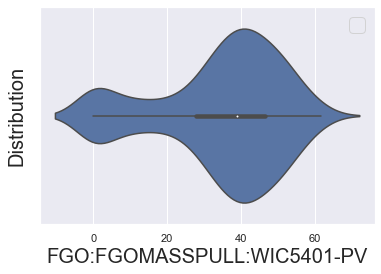

In [35]:
fig_list= list(df_e)
pp = PdfPages('Airflow_level_masspull_WSD_Daily_Violin_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.violinplot(df_e[i].dropna().values)
    
    ax.set(xlabel=i, ylabel='Distribution')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


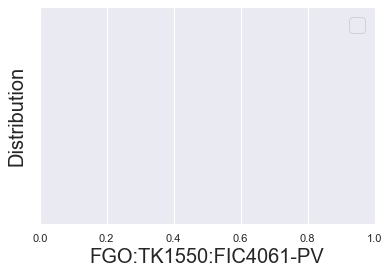

No handles with labels found to put in legend.


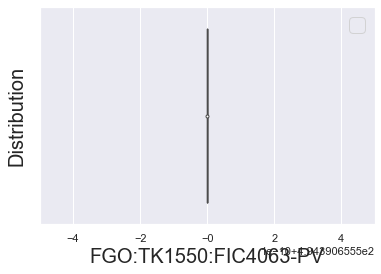

No handles with labels found to put in legend.


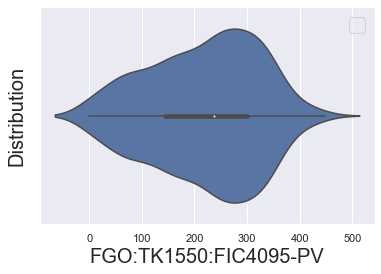

No handles with labels found to put in legend.


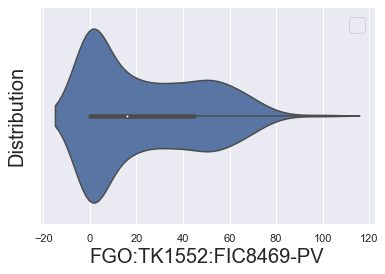

No handles with labels found to put in legend.


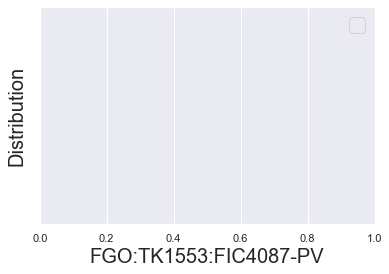

No handles with labels found to put in legend.


No handles with labels found to put in legend.


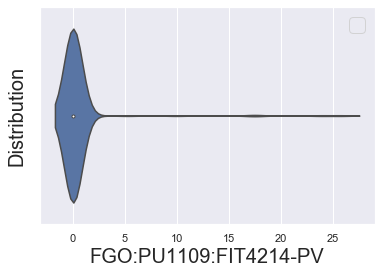

No handles with labels found to put in legend.


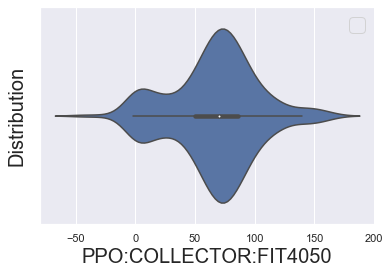

No handles with labels found to put in legend.


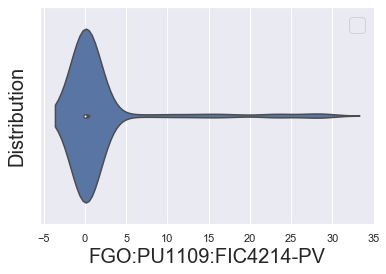

No handles with labels found to put in legend.


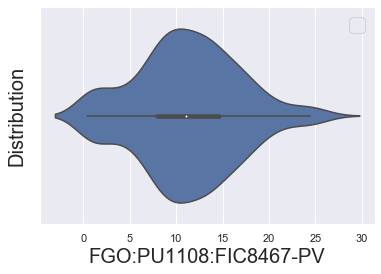

No handles with labels found to put in legend.


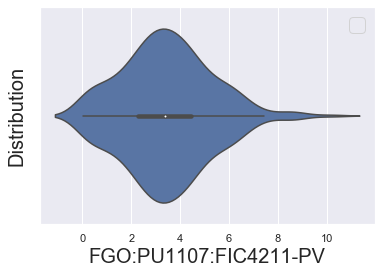

No handles with labels found to put in legend.


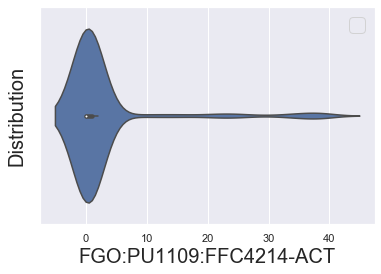

In [36]:
fig_list= list(df_f)
pp = PdfPages('Chemical_add_variables_WSD_Daily_Violin_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.violinplot(df_f[i].dropna().values)
    
    ax.set(xlabel=i, ylabel='Distribution')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


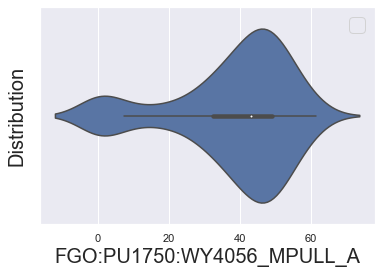

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


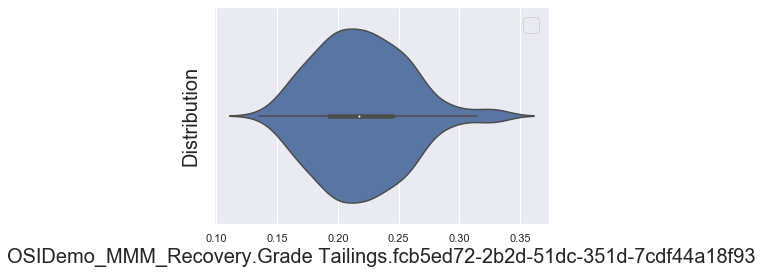

No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


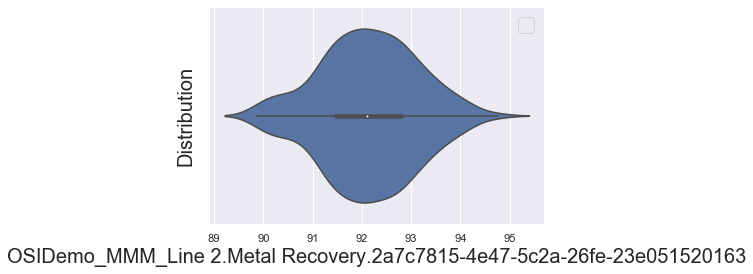

No handles with labels found to put in legend.


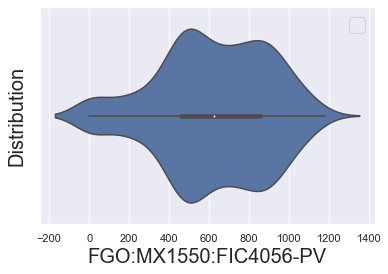

No handles with labels found to put in legend.


No handles with labels found to put in legend.


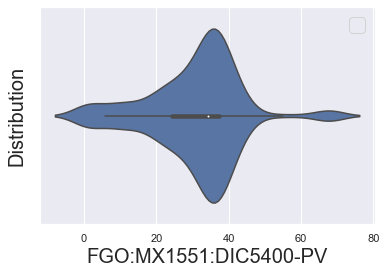

No handles with labels found to put in legend.


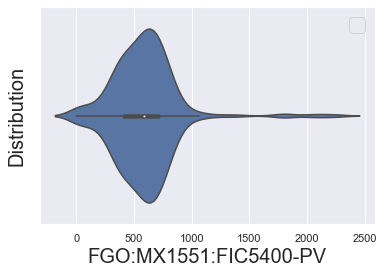

No handles with labels found to put in legend.


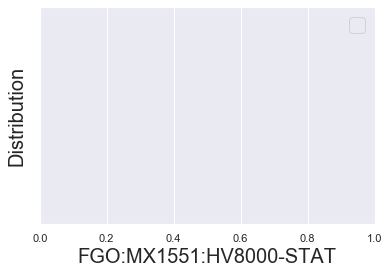

No handles with labels found to put in legend.


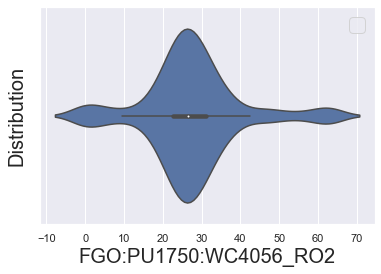

No handles with labels found to put in legend.


No handles with labels found to put in legend.


In [37]:
fig_list= list(df_g)
pp = PdfPages('Additional_masspull_variable_WSD_Daily_Violin_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.violinplot(df_g[i].dropna().values)
    
    ax.set(xlabel=i, ylabel='Distribution')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

No handles with labels found to put in legend.


No handles with labels found to put in legend.


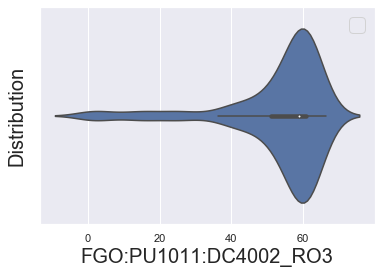

No handles with labels found to put in legend.


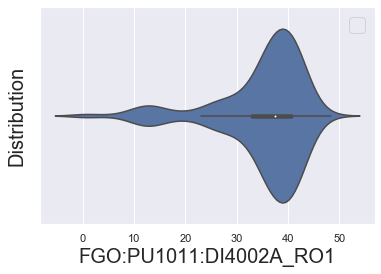

No handles with labels found to put in legend.


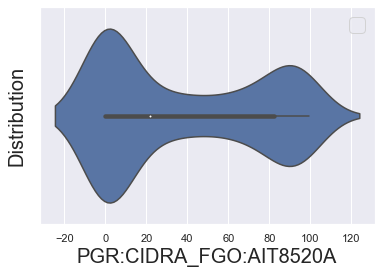

No handles with labels found to put in legend.


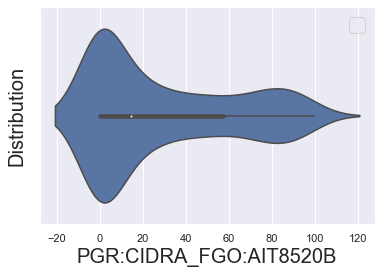

No handles with labels found to put in legend.


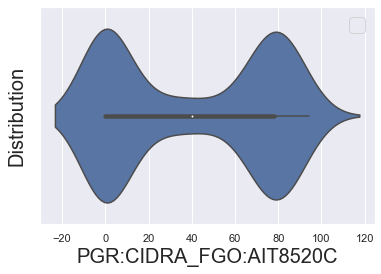

No handles with labels found to put in legend.


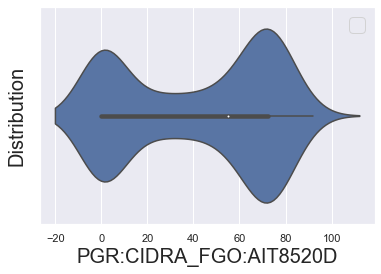

No handles with labels found to put in legend.


No handles with labels found to put in legend.


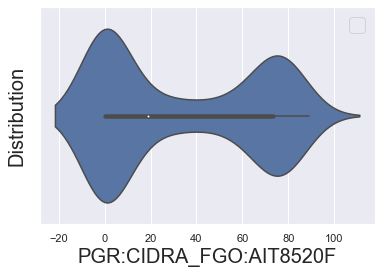

No handles with labels found to put in legend.


No handles with labels found to put in legend.


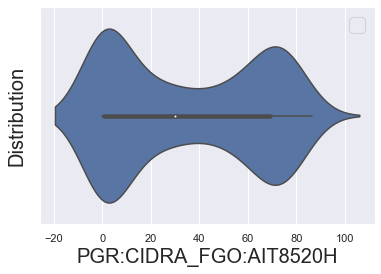

No handles with labels found to put in legend.


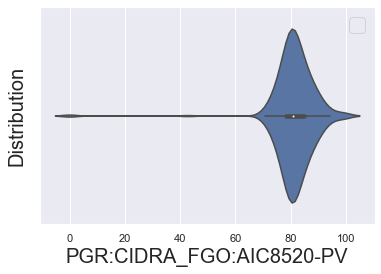

No handles with labels found to put in legend.


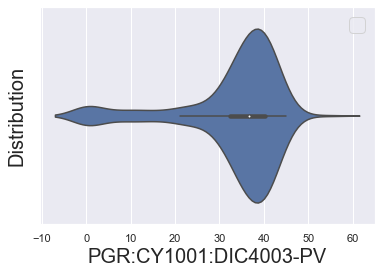

No handles with labels found to put in legend.


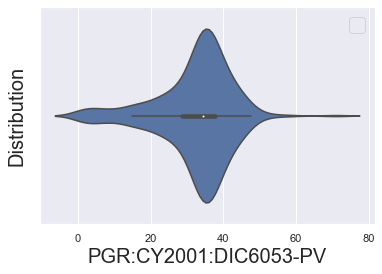

No handles with labels found to put in legend.


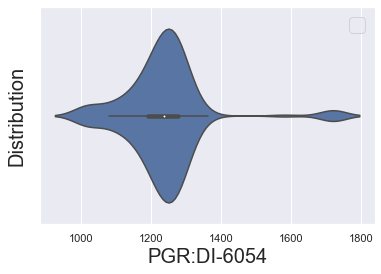

No handles with labels found to put in legend.


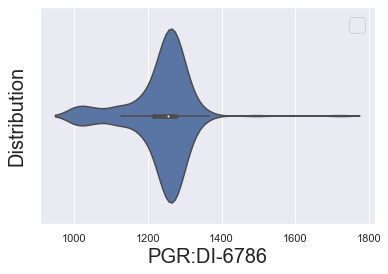

No handles with labels found to put in legend.


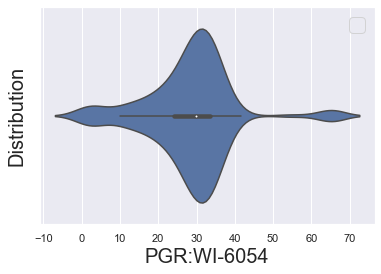

No handles with labels found to put in legend.


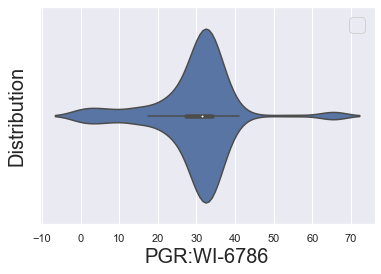

In [38]:
fig_list= list(df_h)
pp = PdfPages('Cyclone_feed_size_WSD_Daily_Violin_plots.pdf')
#merged = list(itertools.chain.from_iterable(fig_list))
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.violinplot(df_h[i].dropna().values)
    
    ax.set(xlabel=i, ylabel='Distribution')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()
pp.close()

# Box Plot- For Checking Outliers

In [ ]:
fig_list= list(data_frame)
pp = PdfPages('Title of the file.pdf')
for i in fig_list:
    fig_n=plt.figure(i)
    ax=sns.boxplot(y=[i],data=data_frame)
    ax.set(xlabel=i, ylabel='Value')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.legend(fontsize=20)
    pp.savefig(fig_n)
    plt.show()